In [39]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data

#### Importing the Data

In [7]:
# Importing the csv file
data = pd.read_excel('Employee_Performance_Data.xls')

#### Exploratory Data Analysis

In [8]:
data.shape

(1200, 28)

In [9]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [11]:
data.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Marketing,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [12]:
#Looking for missing Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [13]:
data.isnull().sum().sum()

0

## Analysis of Department wise Perfomance

In [14]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [15]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Analysis             4.000000
Data Science              3.050000
Development               3.085873
Finance                   2.666667
Human Resources           2.925926
Research & Development    2.774834
Sales                     2.860590
Software Engineer         4.000000
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

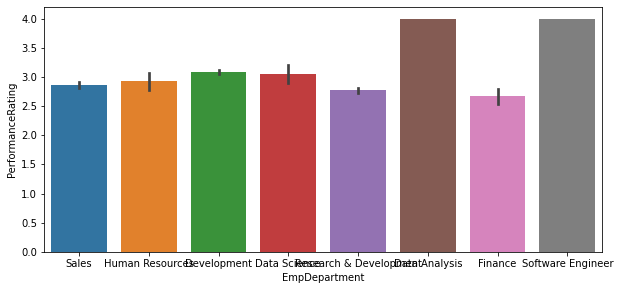

In [16]:
plt.figure(figsize=(10,4.5))
sns.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

In [17]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Analysis           4                     41
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
Sales                   3                    251
                        2                     87
                        4                     35
Software Engineer       4                      4
Name: PerformanceRating, dtype: int64

In [18]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

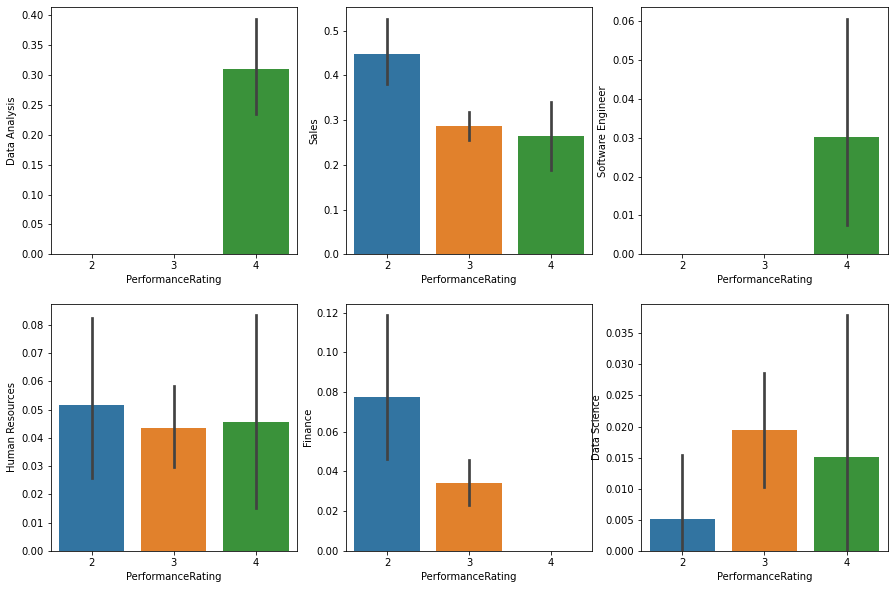

In [19]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Analysis'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Software Engineer'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

## Data Processing/ Data Munging


In [20]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,2,6,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,3,2,6,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,3,1,6,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,1,0,4,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,3,2,6,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


## Feature Selection

In [21]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.043816,-0.098368,-0.008551,-0.031509,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.008476,-0.042169,-0.005211,0.021102,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.043816,0.008476,1.000000,-0.006089,-0.189333,-0.008794,-0.005124,-0.019821,-0.047172,0.059735,...,-0.003561,-0.019400,0.014029,0.040221,-0.020732,-0.009305,-0.000199,-0.018467,0.026649,0.108008
MaritalStatus,-0.098368,-0.042169,-0.006089,1.000000,0.057225,0.032693,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.008551,-0.005211,-0.189333,0.057225,1.000000,0.484045,-0.007955,0.004307,0.018210,-0.053181,...,-0.038765,0.007774,0.051364,0.022209,0.063723,0.077260,0.057130,0.057936,0.041304,-0.320014
EmpJobRole,-0.031509,0.021102,-0.008794,0.032693,0.484045,1.000000,-0.090987,0.018908,-0.019452,0.056742,...,-0.048157,-0.048517,0.008212,-0.006103,-0.007188,0.026505,0.014402,-0.000377,0.029536,-0.065863
BusinessTravelFrequency,0.040579,-0.043608,-0.005124,0.028520,-0.007955,-0.090987,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.019821,-0.019148,0.004307,0.018908,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047172,0.026737,0.018210,-0.019452,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.059735,-0.032467,-0.053181,0.056742,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


In [22]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [23]:
data.head(5)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,6,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,3,2,6,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,3,1,6,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,1,0,4,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,3,2,6,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [25]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6,13,4,12,2,10,7,0,8
1,6,13,4,12,3,7,7,1,7
2,6,13,4,21,3,18,13,1,12
3,4,8,2,15,2,21,6,12,6
4,6,13,1,14,3,2,2,2,2


In [26]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train.shape

(840, 9)

In [34]:
X_test.shape

(360, 9)

## Training the model

In [36]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [37]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [38]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.825
              precision    recall  f1-score   support

           2       0.64      0.46      0.54        63
           3       0.85      0.94      0.89       264
           4       0.81      0.64      0.71        33

    accuracy                           0.82       360
   macro avg       0.77      0.68      0.71       360
weighted avg       0.81      0.82      0.81       360

